In [1]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def get_curve(ts):
    return np.cumprod(ts+1)
def plot(ts):
    plt.plot(get_curve(ts))

In [3]:
def get_portfolioTS(symbols, dir_):
    sers = pd.DataFrame()
    poss = pd.DataFrame()
    for symbol in symbols:
        path_ = '/'.join(('../data',dir_, symbol))
        data_ = pd.read_pickle(path_)
        ts_ = data_['stratret']
        pos_ = data_['pos']
        ts_ = ts_.dropna()
        sers[symbol] = ts_
        poss[symbol] = abs(pos_)
    return sers, poss

In [4]:
#variable: write the name of the directory here
dir_ = 'youngbuck'

# Goals
### Want plots for portfolios of:
* All symbols 2011-2015
* All symbols 2015
* Top N symbols 2011-2014
* The same top N over 2015
* Top N symbols in 2015 (as a control)

### Each portfolio with have return calculated in two ways:
* Constant allocation (sum of returns/#symbols)
* Full allocation (sum of returns/#positions)

453


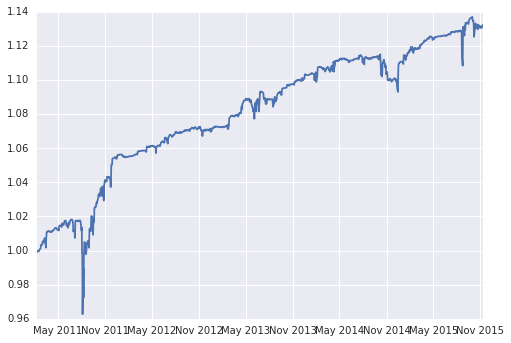

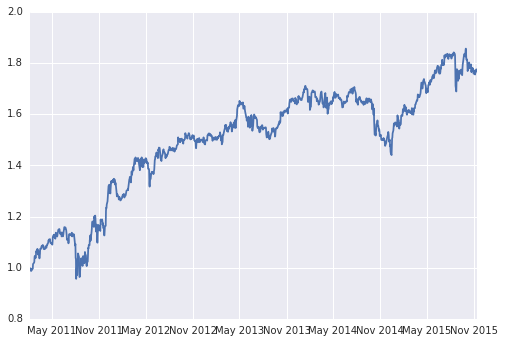

In [5]:
#All symbols 2011-2015
symbols = os.listdir(''.join(('../data/',dir_,'/')))
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2011':'2015'].sum(axis = 1)/sers.shape[1])
show()
plot(sers['2011':'2015'].sum(axis = 1)/poss['2011':'2015'].sum(axis=1))
show()

453


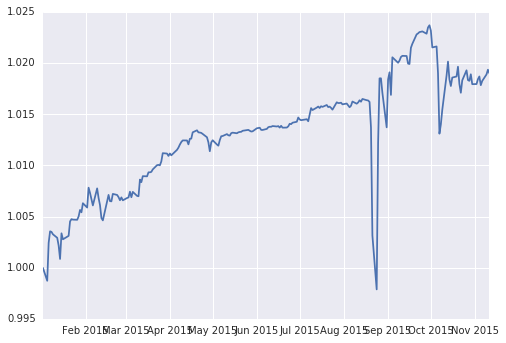

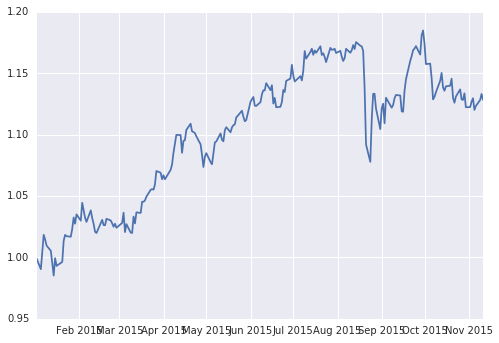

In [6]:
#All symbols 2015
symbols = os.listdir(''.join(('../data/',dir_,'/')))
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)/poss['2011':'2015'].sum(axis=1))
show()

50


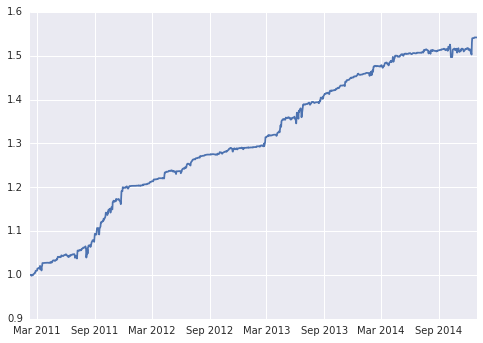

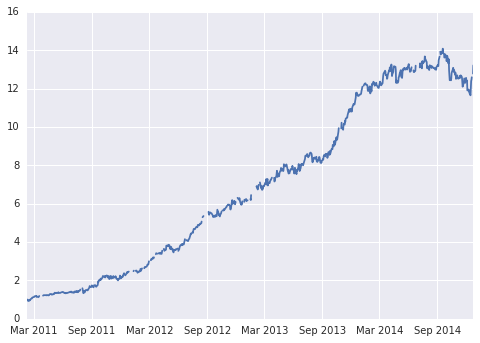

In [7]:
#Top N symbols 2011-2014
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/test_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2011':'2014'].sum(axis = 1)/sers.shape[1])
show()
plot(sers['2011':'2014'].sum(axis = 1)/poss['2011':'2015'].sum(axis=1))
show()

50


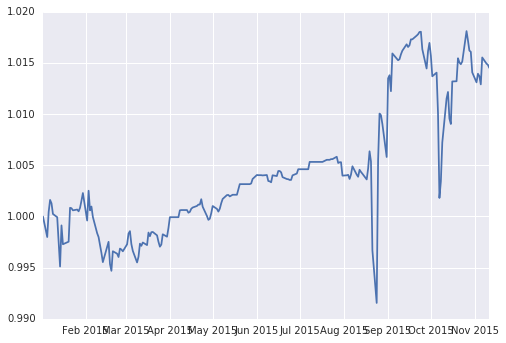

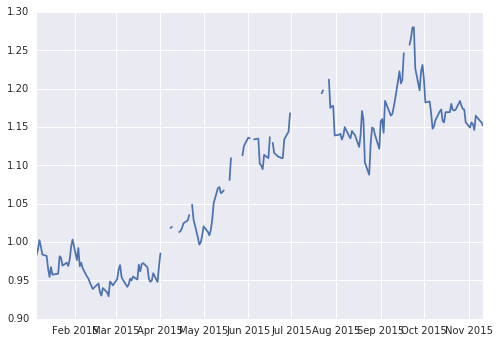

In [8]:
#The same top N over 2015
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/test_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)/poss['2015'].sum(axis=1))
show()

50


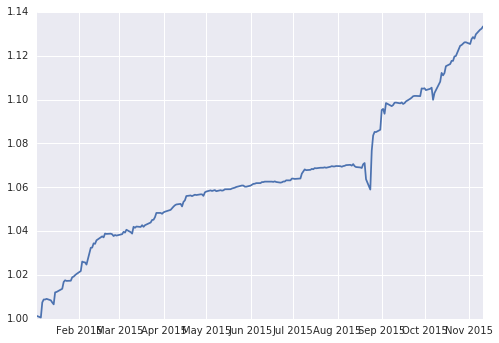

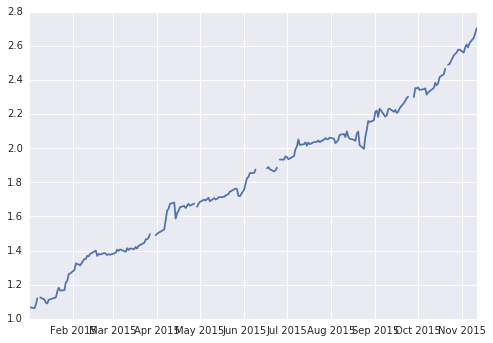

In [9]:
#Top N symbols in 2015 (as a control)
sss = pd.read_csv(''.join(('../data/performance_results/', dir_, '/control(top)_individual.csv')), sep='\t', index_col=0)
symbols=sss.index
sers, poss = get_portfolioTS(symbols, dir_)
print(poss.shape[1])
plot(sers['2015'].sum(axis = 1)/sers.shape[1])
show()
plot(sers['2015'].sum(axis = 1)/poss['2015'].sum(axis=1))
show()